**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KDTree
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [2]:



import numpy.linalg as ln
import numpy as np
import scipy.spatial.distance as dist


class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin, SupervisedIntegerMixin,
                             ClassifierMixin):

    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        indexes = dist.cdist(self.X_train, X).T.argsort()[:, :self.n_neighbors]
        classes = self.y_train[indexes].astype(int)
        max_val_class = int(self.y_train.max())
        classes_count = np.apply_along_axis(
            lambda x: np.bincount(x, minlength=max_val_class + 1),
            axis=1, arr=classes)
        return classes_count.argmax(axis=1)

    def predict_proba(self, X):
        indexes = dist.cdist(self.X_train, X).T.argsort()[:, :self.n_neighbors]
        classes = self.y_train[indexes].astype(int)
        max_val_class = int(self.y_train.max())
        classes_count = np.apply_along_axis(
            lambda x: np.bincount(x, minlength=max_val_class + 1),
            axis=1, arr=classes)
        return classes_count/(classes_count.sum(axis=1)[:, None])

    def score(self, X, y):
        y_predict = self.predict(X)
        return len((np.where(y_predict - y == 0))[0])/len(y)




**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 363 µs, sys: 2.98 ms, total: 3.34 ms
Wall time: 3.02 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 35 µs, sys: 0 ns, total: 35 µs
Wall time: 52.2 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 690 µs, sys: 3.04 ms, total: 3.73 ms
Wall time: 3.05 ms


array([1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 2.66 ms, sys: 0 ns, total: 2.66 ms
Wall time: 1.84 ms


array([1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 2.57 ms, sys: 0 ns, total: 2.57 ms
Wall time: 1.98 ms


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.14 ms, sys: 127 µs, total: 1.26 ms
Wall time: 1.26 ms


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

11


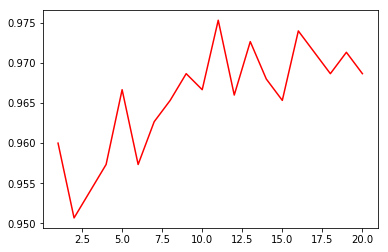

In [14]:
num = 20
bunch = 100
ans = np.zeros(num)
m = np.zeros(bunch)
for j in range(1, num + 1):
    for i in range(0, bunch):
        X_train, X_test, y_train, y_test = train_test_split(
            iris.data, iris.target, test_size=0.1, stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=j)
        my_clf.fit(X_train, y_train)
        m[i] = my_clf.score(X_test, y_test)
    ans[j-1] = m.mean()
print(ans.argmax()+1)
plt.plot(range(1, num + 1), ans, 'red')
plt.show()

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 1min 56s, sys: 639 ms, total: 1min 57s
Wall time: 1min 57s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 20.7 µs


In [20]:
%time clf.predict(X_test)

CPU times: user 1min 55s, sys: 13.4 ms, total: 1min 55s
Wall time: 1min 55s


array([8., 7., 6., 3., 0., 8., 8., 7., 8., 0., 6., 5., 2., 4., 4., 8., 0.,
       3., 0., 8., 9., 5., 1., 5., 6., 7., 5., 7., 6., 5., 4., 5., 9., 2.,
       5., 0., 4., 7., 2., 9., 0., 3., 9., 4., 4., 8., 0., 9., 8., 9., 1.,
       9., 8., 7., 3., 6., 9., 5., 9., 1., 3., 9., 9., 0., 0., 6., 0., 6.,
       3., 5., 1., 6., 5., 4., 6., 1., 8., 9., 3., 2., 6., 4., 6., 1., 8.,
       2., 5., 0., 0., 2., 6., 9., 2., 1., 2., 4., 9., 8., 1., 6., 2., 7.,
       8., 2., 6., 5., 0., 2., 1., 4., 1., 8., 3., 8., 4., 5., 5., 9., 9.,
       0., 6., 0., 1., 4., 0., 4., 7., 3., 8., 2., 9., 7., 2., 5., 4., 2.,
       1., 1., 4., 1., 0., 0., 1., 3., 8., 1., 3., 6., 8., 5., 7., 5., 0.,
       7., 0., 1., 2., 7., 2., 0., 3., 3., 8., 6., 0., 9., 7., 5., 2., 1.,
       1., 1., 5., 3., 4., 7., 9., 1., 7., 9., 0., 8., 5., 8., 3., 4., 3.,
       5., 2., 3., 3., 7., 0., 4., 5., 6., 3., 3., 9., 4., 3., 1., 1., 2.,
       1., 7., 7., 6., 2., 6., 5., 6., 1., 4., 0., 0., 5., 2., 6., 7., 7.,
       7., 8., 8., 7., 0.

In [21]:
%time my_clf.predict(X_test)

CPU times: user 50 s, sys: 776 ms, total: 50.8 s
Wall time: 51 s


array([8, 7, 6, 3, 0, 8, 8, 7, 8, 0, 6, 5, 2, 4, 4, 8, 0, 3, 0, 8, 9, 5,
       1, 5, 6, 7, 5, 7, 6, 5, 4, 5, 9, 2, 5, 0, 4, 7, 2, 9, 0, 3, 9, 4,
       4, 8, 0, 9, 8, 9, 1, 9, 8, 7, 3, 6, 9, 5, 9, 1, 3, 9, 9, 0, 0, 6,
       0, 6, 3, 5, 1, 6, 5, 4, 6, 1, 8, 9, 3, 2, 6, 4, 6, 1, 8, 2, 5, 0,
       0, 2, 6, 9, 2, 1, 2, 4, 9, 8, 1, 6, 2, 7, 8, 2, 6, 5, 0, 2, 1, 4,
       1, 8, 3, 8, 4, 5, 5, 9, 9, 0, 6, 0, 1, 4, 0, 4, 7, 3, 8, 2, 9, 7,
       2, 5, 4, 2, 1, 1, 4, 1, 0, 0, 1, 3, 8, 1, 3, 6, 8, 5, 7, 5, 0, 7,
       0, 1, 2, 7, 2, 0, 3, 3, 8, 6, 0, 9, 7, 5, 2, 1, 1, 1, 5, 3, 4, 7,
       9, 1, 7, 9, 0, 8, 5, 8, 3, 4, 3, 5, 2, 3, 3, 7, 0, 4, 5, 6, 3, 3,
       9, 4, 3, 1, 1, 2, 1, 7, 7, 6, 2, 6, 5, 6, 1, 4, 0, 0, 5, 2, 6, 7,
       7, 7, 8, 8, 7, 0, 0, 6, 0, 5, 3, 4, 5, 0, 0, 4, 9, 3, 5, 1, 3, 2,
       7, 4, 0, 1, 5, 9, 5, 1, 4, 8, 5, 4, 9, 5, 7, 9, 5, 3, 9, 0, 5, 3,
       2, 2, 4, 6, 6, 3, 9, 7, 5, 0, 7, 8, 3, 4, 6, 7, 6, 2, 1, 8, 8, 5,
       8, 5, 5, 7, 2, 7, 0, 1, 9, 1, 6, 6, 8, 6, 6,

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 1min 55s, sys: 6.66 ms, total: 1min 55s
Wall time: 1min 55s


array([[0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.5],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 50 s, sys: 793 ms, total: 50.8 s
Wall time: 51 s


array([[0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.5],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [24]:
clf.score(X_test, y_test)

0.9757142857142858

In [25]:
my_clf.score(X_test, y_test)

0.9757142857142858

Задание 4

In [26]:
class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin, SupervisedIntegerMixin,
                             ClassifierMixin):

    def __init__(self, n_neighbors = 17, algorithm=None):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        if (self.algorithm == "kd_tree"):
            tree = KDTree(self.X_train)
            cl_dist, indexes = tree.query(X, self.n_neighbors)
        else:
            indexes = dist.cdist(self.X_train, X).T.argsort()[:, :self.n_neighbors]
        classes = self.y_train[indexes].astype(int)
        max_val_class = int(self.y_train.max())
        classes_count = np.apply_along_axis(
            lambda x: np.bincount(x, minlength=max_val_class + 1),
            axis=1, arr=classes)
        return classes_count.argmax(axis=1)

    def predict_proba(self, X):
        if (self.algorithm == "kd_tree"):
            tree = KDTree(self.X_train)
            cl_dist, indexes = tree.query(X, self.n_neighbors)
        else:
            indexes = dist.cdist(self.X_train, X).T.argsort()[:, :self.n_neighbors]
        classes = self.y_train[indexes].astype(int)
        max_val_class = int(self.y_train.max())
        classes_count = np.apply_along_axis(
            lambda x: np.bincount(x, minlength=max_val_class + 1),
            axis=1, arr=classes)
        return classes_count/(classes_count.sum(axis=1)[:, None])

    def score(self, X, y):
        y_predict = self.predict(X)
        return len((np.where(y_predict - y == 0))[0])/len(y)




In [27]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [29]:
%time clf.fit(X_train, y_train)

CPU times: user 1min 54s, sys: 631 ms, total: 1min 54s
Wall time: 1min 55s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [30]:
%time my_clf.fit(X_train, y_train)

CPU times: user 14 µs, sys: 0 ns, total: 14 µs
Wall time: 20.3 µs


In [31]:
%time clf.predict(X_test)

CPU times: user 1min 55s, sys: 35.6 ms, total: 1min 55s
Wall time: 1min 55s


array([5., 2., 5., 8., 7., 8., 9., 6., 1., 1., 1., 0., 0., 8., 6., 1., 4.,
       0., 2., 4., 3., 1., 3., 1., 8., 8., 7., 8., 7., 1., 8., 5., 5., 1.,
       8., 7., 5., 7., 9., 4., 8., 0., 4., 9., 9., 7., 5., 2., 9., 1., 1.,
       7., 8., 4., 2., 7., 8., 8., 9., 7., 8., 7., 1., 2., 1., 1., 2., 0.,
       7., 7., 6., 3., 5., 0., 5., 7., 8., 9., 0., 2., 7., 8., 0., 4., 1.,
       2., 7., 1., 6., 8., 8., 0., 4., 5., 2., 6., 1., 7., 3., 2., 5., 6.,
       5., 3., 0., 6., 7., 2., 7., 3., 8., 3., 0., 3., 0., 4., 7., 6., 6.,
       2., 5., 7., 7., 3., 2., 8., 8., 8., 4., 4., 7., 9., 0., 7., 5., 3.,
       3., 7., 1., 7., 5., 1., 2., 0., 2., 0., 7., 9., 0., 5., 1., 7., 5.,
       1., 3., 8., 1., 8., 5., 0., 3., 4., 0., 0., 1., 9., 0., 0., 3., 8.,
       3., 5., 5., 3., 0., 0., 9., 5., 3., 7., 2., 1., 4., 3., 5., 6., 1.,
       0., 8., 4., 0., 6., 9., 6., 3., 0., 3., 9., 6., 2., 0., 2., 0., 7.,
       4., 4., 1., 6., 2., 9., 3., 2., 1., 2., 3., 0., 5., 3., 0., 1., 9.,
       9., 4., 1., 2., 5.

In [32]:
%time my_clf.predict(X_test)

CPU times: user 3min 24s, sys: 1.2 s, total: 3min 25s
Wall time: 3min 26s


array([5, 2, 5, 8, 7, 8, 9, 6, 1, 1, 1, 0, 0, 8, 6, 1, 4, 0, 2, 4, 3, 1,
       3, 1, 8, 8, 7, 8, 7, 1, 8, 5, 5, 1, 8, 7, 5, 7, 9, 4, 8, 0, 4, 9,
       9, 7, 5, 2, 9, 1, 1, 7, 8, 4, 2, 7, 8, 8, 9, 7, 8, 7, 1, 2, 1, 1,
       2, 0, 7, 7, 6, 3, 5, 0, 5, 7, 8, 9, 0, 2, 7, 8, 0, 4, 1, 2, 7, 1,
       6, 8, 8, 0, 4, 5, 2, 6, 1, 7, 3, 2, 5, 6, 5, 3, 0, 6, 7, 2, 7, 3,
       8, 3, 0, 3, 0, 4, 7, 6, 6, 2, 5, 7, 7, 3, 2, 8, 8, 8, 4, 4, 7, 9,
       0, 7, 5, 3, 3, 7, 1, 7, 5, 1, 2, 0, 2, 0, 7, 9, 0, 5, 1, 7, 5, 1,
       3, 8, 1, 8, 5, 0, 3, 4, 0, 0, 1, 9, 0, 0, 3, 8, 3, 5, 5, 3, 0, 0,
       9, 5, 3, 7, 2, 1, 4, 3, 5, 6, 1, 0, 8, 4, 0, 6, 9, 6, 3, 0, 3, 9,
       6, 2, 0, 2, 0, 7, 4, 4, 1, 6, 2, 9, 3, 2, 1, 2, 3, 0, 5, 3, 0, 1,
       9, 9, 4, 1, 2, 5, 4, 5, 6, 3, 3, 8, 4, 6, 5, 7, 2, 5, 4, 2, 8, 5,
       2, 6, 1, 5, 1, 8, 6, 3, 1, 9, 3, 4, 2, 5, 4, 8, 1, 5, 5, 3, 9, 6,
       8, 8, 5, 2, 0, 8, 4, 6, 0, 6, 7, 9, 9, 1, 9, 9, 4, 5, 7, 9, 1, 2,
       0, 0, 2, 2, 7, 7, 2, 7, 1, 7, 0, 9, 3, 4, 2,

In [33]:
%time clf.predict_proba(X_test)

CPU times: user 1min 55s, sys: 45 ms, total: 1min 55s
Wall time: 1min 55s


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ]])

In [34]:
%time my_clf.predict_proba(X_test)

CPU times: user 3min 24s, sys: 1.16 s, total: 3min 26s
Wall time: 3min 26s


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ]])

In [35]:
clf.score(X_test, y_test)

0.9771428571428571

In [36]:
my_clf.score(X_test, y_test)

0.9771428571428571

Задание 5

In [37]:
# seaborn - надстройка над matplotlib для визуализации статистических данных
# matplotlib - основная библиотека для построения графиков
# train_test_split - библиотека для разбиения данных для обучения
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - создание пайплайнов - конвееров
# StandardScaler (from sklearn.preprocessing import StandardScaler) - нормализация данных
# ClassifierMixin - базовый класс класификаторов sclearn
# NeighborsBase - базовый класс для алгоритмов ближайших соседей 
# KNeighborsMixin - класс реализующий поиск ближайших соседей
# SupervisedIntegerMixin - базовый класс для создания алгоритмов обучения с учителем